In [1]:
%run import.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23596 entries, 0 to 5184
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Geography                  23596 non-null  object 
 1   Timeframe                  23592 non-null  object 
 2   Current Year Week Ending   23592 non-null  object 
 3   Type                       23592 non-null  object 
 4   ASP Current Year           23592 non-null  float64
 5   Total Bulk and Bags Units  23592 non-null  float64
 6   4046 Units                 23592 non-null  float64
 7   4225 Units                 23592 non-null  float64
 8   4770 Units                 23592 non-null  float64
 9   TotalBagged Units          23592 non-null  float64
 10  SmlBagged Units            0 non-null      float64
 11  LrgBagged Units            0 non-null      float64
 12  X-LrgBagged Units          0 non-null      float64
dtypes: float64(9), object(4)
memory usage: 2.5+ MB


In [2]:
df_conventional = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Conventional']
df_organic = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Organic']

In [3]:
# Filtrar los datos por tipo de aguacate
price_conventional = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Conventional'][['Current Year Week Ending', 'ASP Current Year']]
price_organic = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Organic'][['Current Year Week Ending', 'ASP Current Year']]

In [4]:
# Asegurar que la columna de fecha es de tipo datetime
price_conventional['Current Year Week Ending'] = pd.to_datetime(price_conventional['Current Year Week Ending'])
price_organic['Current Year Week Ending'] = pd.to_datetime(price_organic['Current Year Week Ending'])

In [5]:
# Convertir a datetime
filtered_df_greaterregions['Current Year Week Ending'] = pd.to_datetime(filtered_df_greaterregions['Current Year Week Ending'])
df_conventional['Current Year Week Ending'] = pd.to_datetime(df_conventional['Current Year Week Ending'])
df_organic['Current Year Week Ending'] = pd.to_datetime(df_organic['Current Year Week Ending'])

C:\Users\heatb\AppData\Local\Temp\ipykernel_256\2990133330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Current Year Week Ending'] = pd.to_datetime(filtered_df_greaterregions['Current Year Week Ending'])
C:\Users\heatb\AppData\Local\Temp\ipykernel_256\2990133330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conventional['Current Year Week Ending'] = pd.to_datetime(df_conventional['Current Year Week Ending'])
C:\Users\heatb\AppData\Local\Temp\ipykernel_256\29901333

In [6]:
# Extraer el número de semana del año
filtered_df_greaterregions['Week_Number'] = filtered_df_greaterregions['Current Year Week Ending'].dt.isocalendar().week
df_conventional['Week_Number'] = df_conventional['Current Year Week Ending'].dt.isocalendar().week
df_organic['Week_Number'] = df_organic['Current Year Week Ending'].dt.isocalendar().week

C:\Users\heatb\AppData\Local\Temp\ipykernel_256\2265856182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Week_Number'] = filtered_df_greaterregions['Current Year Week Ending'].dt.isocalendar().week
C:\Users\heatb\AppData\Local\Temp\ipykernel_256\2265856182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conventional['Week_Number'] = df_conventional['Current Year Week Ending'].dt.isocalendar().week
C:\Users\heatb\AppData\Local\Temp\ipykernel_256\2265856182.py:4: Setti

In [7]:
# Agrupar por número de semana y calcular el promedio de precios
conventional_seasonality = df_conventional.groupby('Week_Number')['ASP Current Year'].mean()
organic_seasonality = df_organic.groupby('Week_Number')['ASP Current Year'].mean()

In [8]:
# Crear un DataFrame para visualizar mejor
seasonality_df = pd.DataFrame({
    'Conventional': conventional_seasonality,
    'Organic': organic_seasonality
}).reset_index()

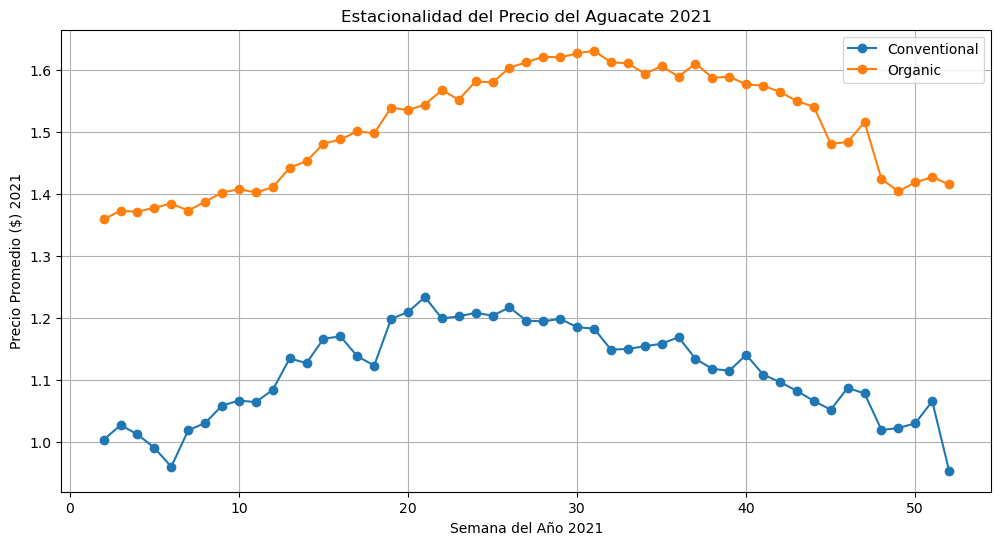

In [9]:
# Visualización de la estacionalidad
plt.figure(figsize=(12, 6))
plt.plot(seasonality_df['Week_Number'], seasonality_df['Conventional'], label='Conventional', marker='o')
plt.plot(seasonality_df['Week_Number'], seasonality_df['Organic'], label='Organic', marker='o')

plt.title('Estacionalidad del Precio del Aguacate 2021')
plt.xlabel('Semana del Año 2021')
plt.ylabel('Precio Promedio ($) 2021')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Extraer mes y año
# Crear columnas de Year y Month
filtered_df_greaterregions['Year'] = filtered_df_greaterregions['Current Year Week Ending'].dt.year
filtered_df_greaterregions['Month'] = filtered_df_greaterregions['Current Year Week Ending'].dt.month


C:\Users\heatb\AppData\Local\Temp\ipykernel_256\1689713662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Year'] = filtered_df_greaterregions['Current Year Week Ending'].dt.year
C:\Users\heatb\AppData\Local\Temp\ipykernel_256\1689713662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Month'] = filtered_df_greaterregions['Current Year Week Ending'].dt.month


In [11]:
# Filtrar nuevamente para asegurarse de que Year y Month estén presentes
df_conventional = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Conventional']
df_organic = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Organic']


In [12]:
# Agrupar por Year y Month para calcular promedios
monthly_conventional = (
    df_conventional.groupby(['Year', 'Month'])['ASP Current Year']
    .mean()
    .reset_index()
    .rename(columns={'ASP Current Year': 'Conventional'})
)

monthly_organic = (
    df_organic.groupby(['Year', 'Month'])['ASP Current Year']
    .mean()
    .reset_index()
    .rename(columns={'ASP Current Year': 'Organic'})
)

In [13]:
# Combinar ambos en un solo DataFrame
monthly_seasonality = pd.merge(
    monthly_conventional, 
    monthly_organic, 
    on=['Year', 'Month'], 
    how='outer'
)

# Crear etiquetas de tiempo
monthly_seasonality['Time'] = pd.to_datetime(
    monthly_seasonality[['Year', 'Month']].assign(Day=1)
).dt.strftime('%b %Y')

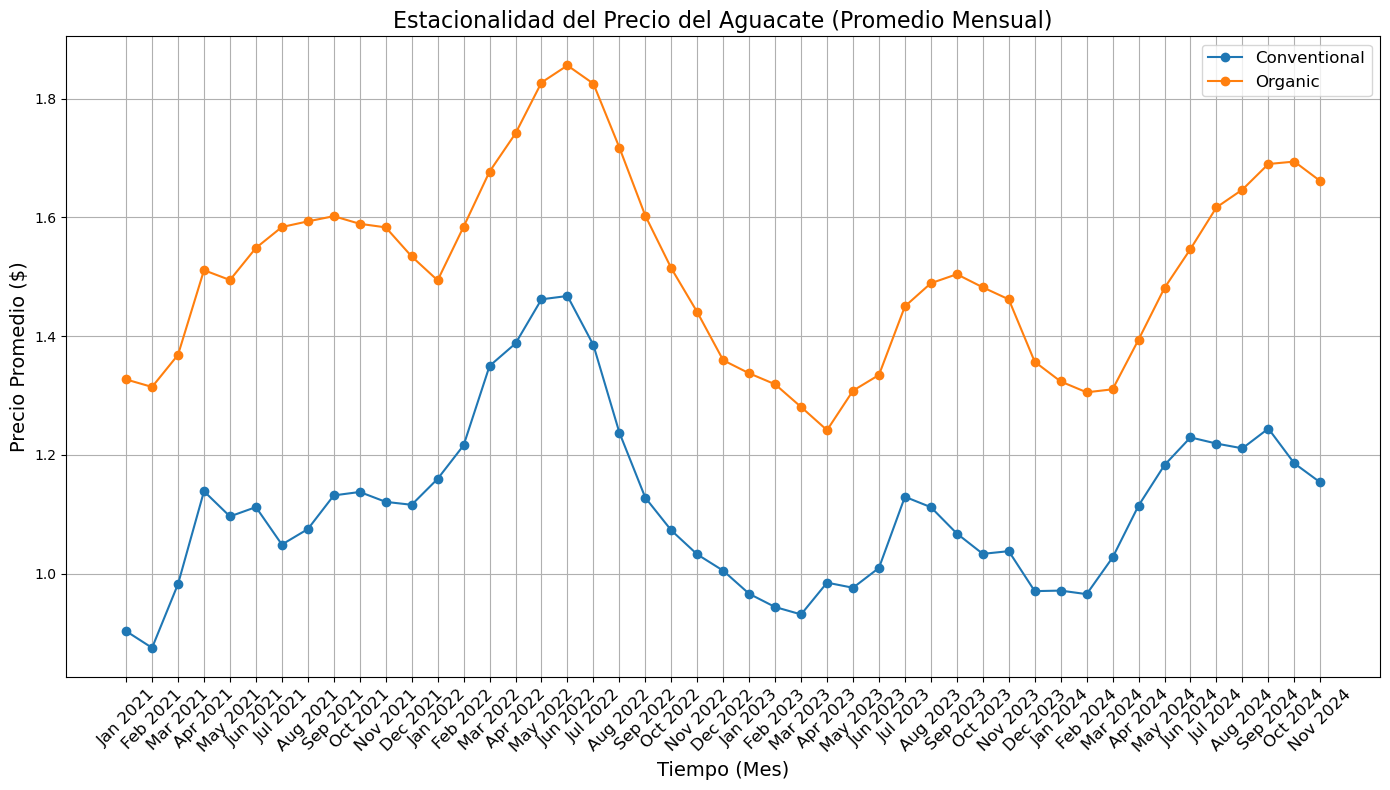

In [14]:
# Graficar
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.plot(monthly_seasonality['Time'], monthly_seasonality['Conventional'], label='Conventional', marker='o')
plt.plot(monthly_seasonality['Time'], monthly_seasonality['Organic'], label='Organic', marker='o')
plt.title('Estacionalidad del Precio del Aguacate (Promedio Mensual)', fontsize=16)
plt.xlabel('Tiempo (Mes)', fontsize=14)
plt.ylabel('Precio Promedio ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
#Recuperamos las variables definidas al principio de precio organico y precio convencional
#Las agrupamos por fechas para obtener el promedio diario
price_conventional = price_conventional.groupby('Current Year Week Ending').mean()
price_organic = price_organic.groupby('Current Year Week Ending').mean()

In [16]:
# Descomponemos la serie temporal de aguacates orgánicos
decompose_organic = seasonal_decompose(price_organic, model='additive', period=52)

# Descomponemos la serie temporal de aguacates convencionales
decompose_conventional = seasonal_decompose(price_conventional, model='additive', period=52)

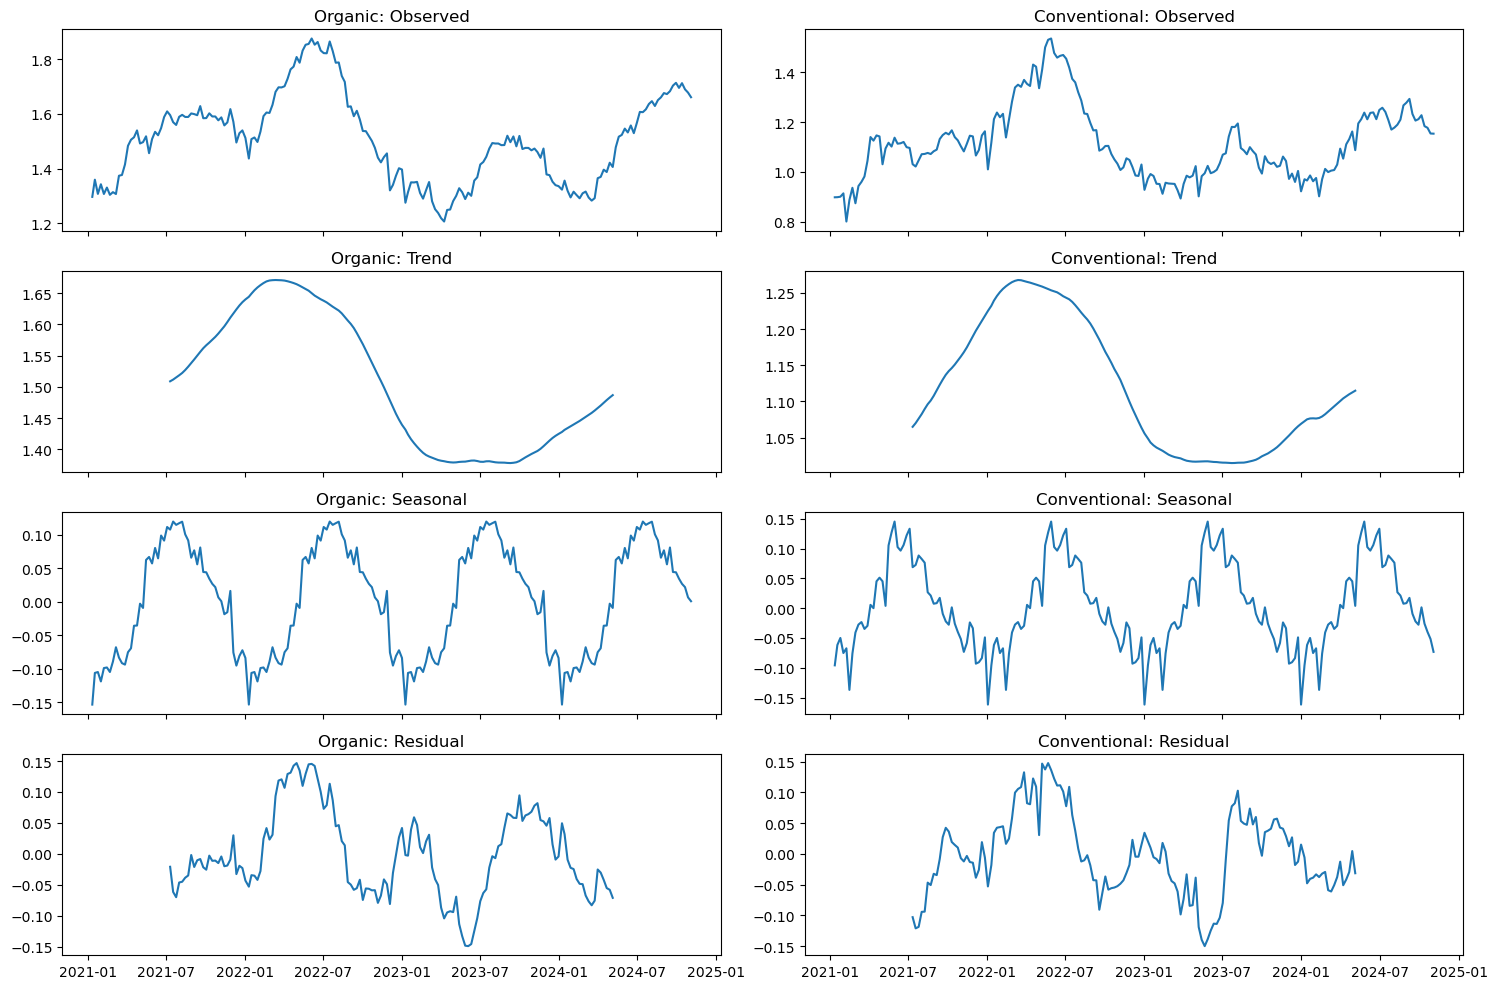

In [17]:
# Configuramos los gráficos
fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)

# Graficamos para aguacates orgánicos
axes[0, 0].plot(decompose_organic.observed, label='Observed')
axes[0, 0].set_title('Organic: Observed')
axes[1, 0].plot(decompose_organic.trend, label='Trend')
axes[1, 0].set_title('Organic: Trend')
axes[2, 0].plot(decompose_organic.seasonal, label='Seasonal')
axes[2, 0].set_title('Organic: Seasonal')
axes[3, 0].plot(decompose_organic.resid, label='Residual')
axes[3, 0].set_title('Organic: Residual')

# Graficamos para aguacates convencionales
axes[0, 1].plot(decompose_conventional.observed, label='Observed')
axes[0, 1].set_title('Conventional: Observed')
axes[1, 1].plot(decompose_conventional.trend, label='Trend')
axes[1, 1].set_title('Conventional: Trend')
axes[2, 1].plot(decompose_conventional.seasonal, label='Seasonal')
axes[2, 1].set_title('Conventional: Seasonal')
axes[3, 1].plot(decompose_conventional.resid, label='Residual')
axes[3, 1].set_title('Conventional: Residual')

# Ajustamos diseño
plt.tight_layout()

# Se muestran los gráficos
plt.show()

Teniendo el insight de que se produce una estacionalidad elevada durante los meses de verano, con picos en junio y julio, vamos a analizar por greater region que tal son las estacionalidades en cada región.

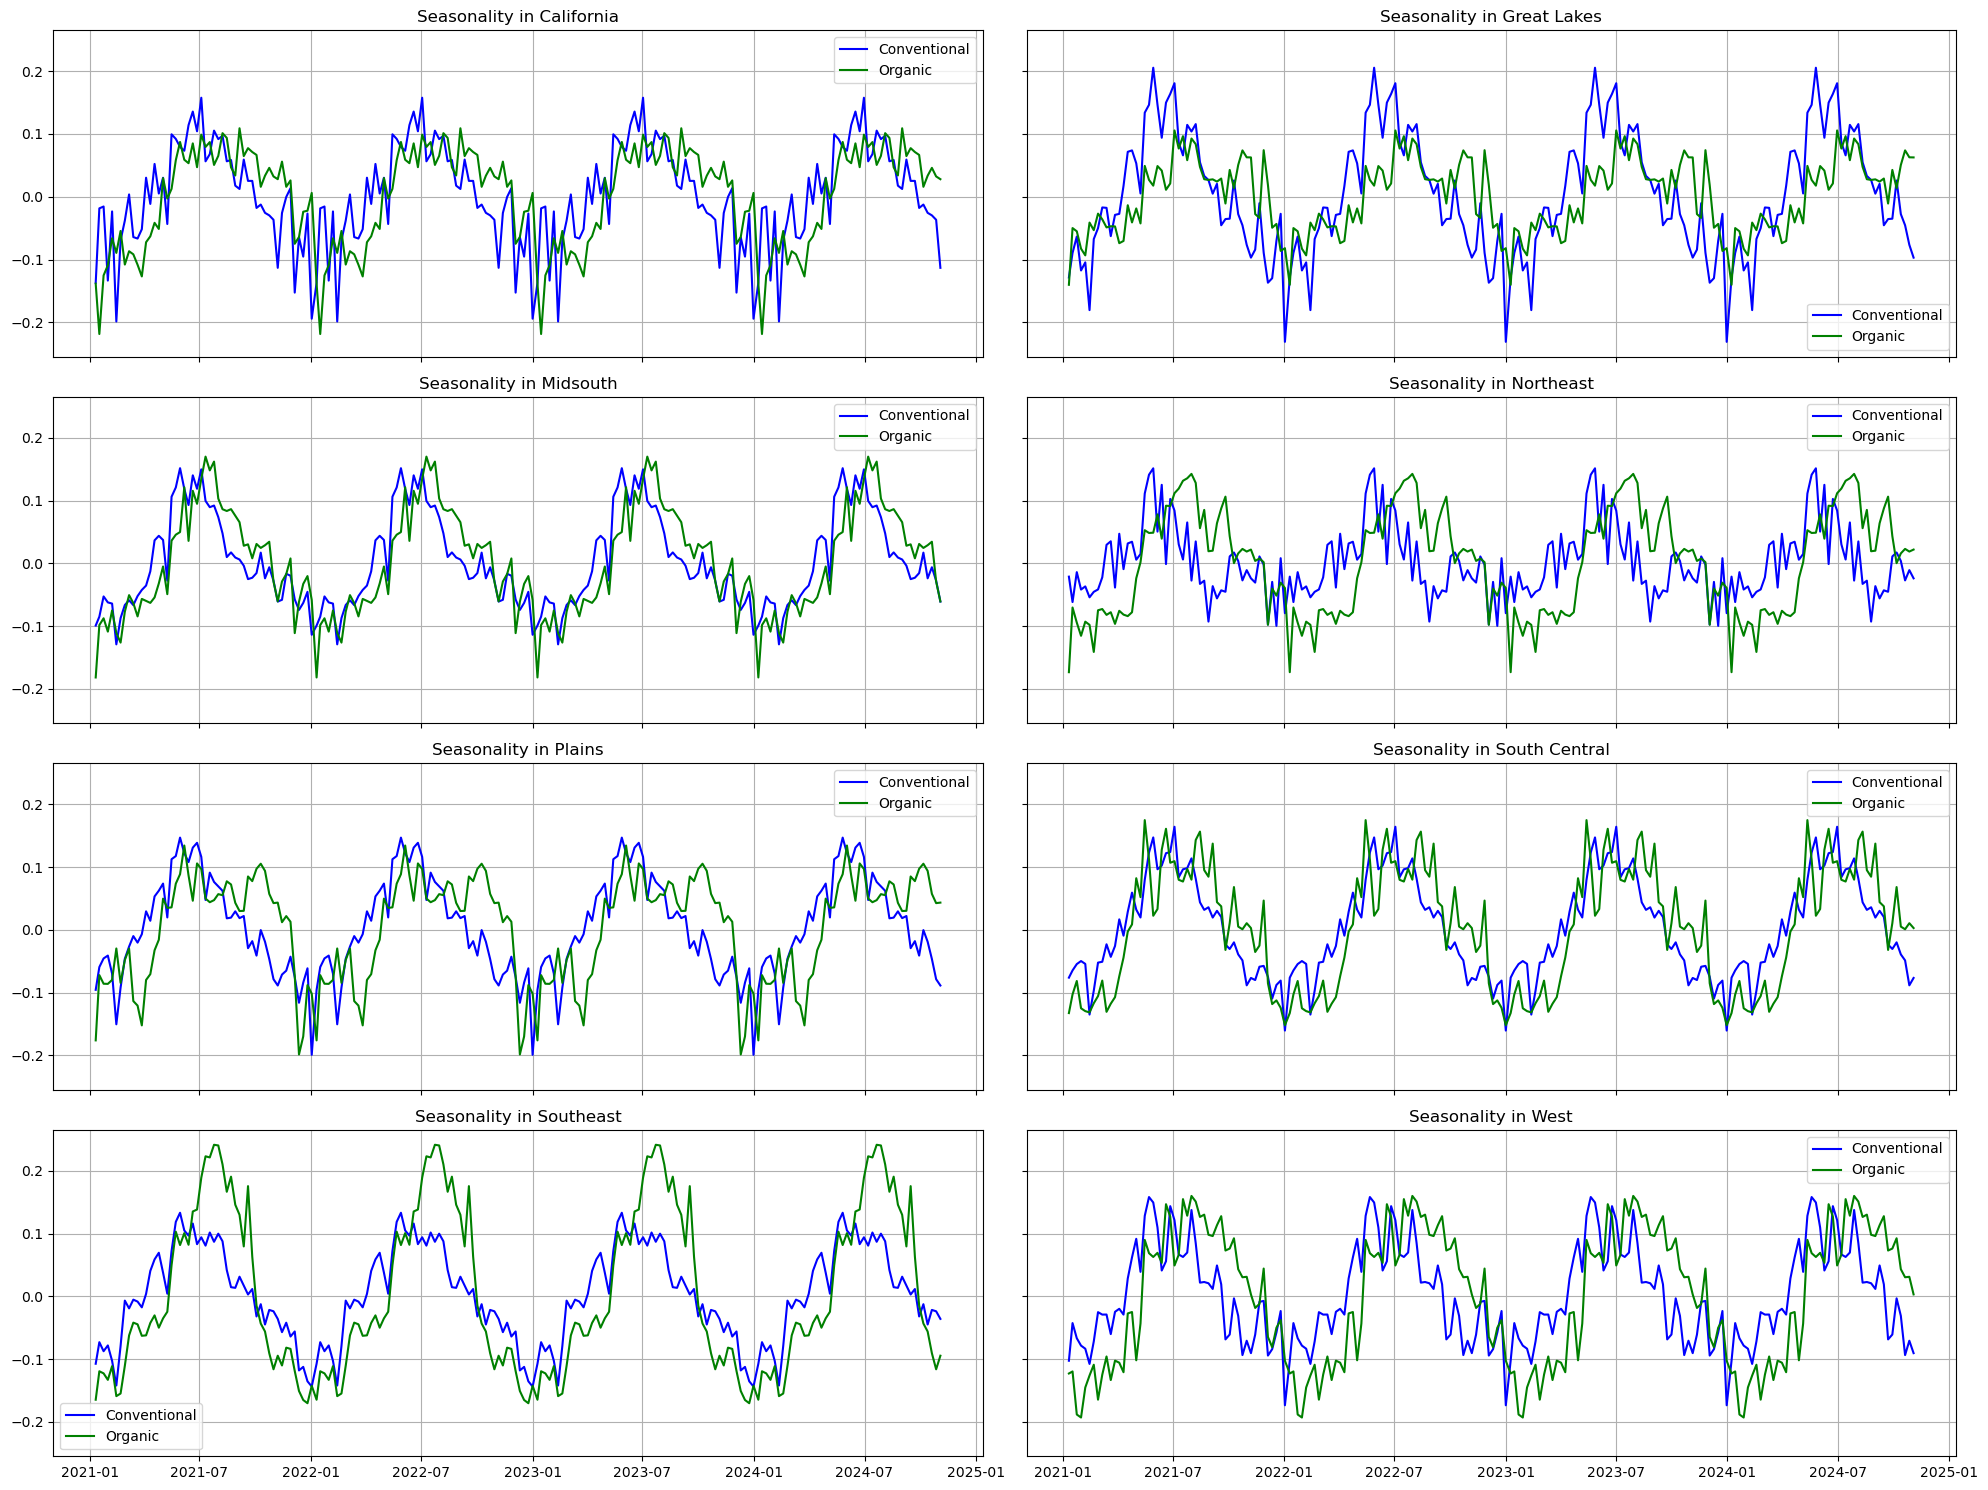

In [18]:
# Lista de regiones
greaterregions = ['California', 'Great Lakes', 'Midsouth', 'Northeast', 
                  'Plains', 'South Central', 'Southeast', 'West']

# Crear figura para graficar todas las regiones
fig, axes = plt.subplots(4, 2, figsize=(20, 15), sharex=True, sharey=True)
axes = axes.flatten()

# Iterar por cada región
for i, region in enumerate(greaterregions):
    # Filtrar datos para la región actual
    region_data = filtered_df_greaterregions[filtered_df_greaterregions['Geography'] == region]


    # Incluimos los datos de tipo de aguacate para cada region filtrada
    price_conventional = region_data[region_data['Type'] == 'Conventional'][['Current Year Week Ending', 'ASP Current Year']]
    price_organic = region_data[region_data['Type'] == 'Organic'][['Current Year Week Ending', 'ASP Current Year']]

    # Convertimos la columna de fecha a tipo datetime
    price_conventional['Current Year Week Ending'] = pd.to_datetime(price_conventional['Current Year Week Ending'])
    price_organic['Current Year Week Ending'] = pd.to_datetime(price_organic['Current Year Week Ending'])

    # Agrupamos por fecha obteniendo el promedio
    price_conventional = price_conventional.groupby('Current Year Week Ending').mean()
    price_organic = price_organic.groupby('Current Year Week Ending').mean()

    # Descomponemos otra vez la serie temporal
    decompose_conventional = seasonal_decompose(price_conventional, model='additive', period=52)
    decompose_organic = seasonal_decompose(price_organic, model='additive', period=52)

    # Graficar la componente estacional
    ax = axes[i]
    ax.plot(decompose_conventional.seasonal, label='Conventional', color='blue')
    ax.plot(decompose_organic.seasonal, label='Organic', color='green')
    ax.set_title(f'Seasonality in {region}')
    ax.legend()
    ax.grid()

# Ajustar diseño
plt.tight_layout()
plt.show()

In [19]:
# Intentamos una descomposición multiplicativa
decompose_organic_mult = seasonal_decompose(price_organic, model='multiplicative', period=52)


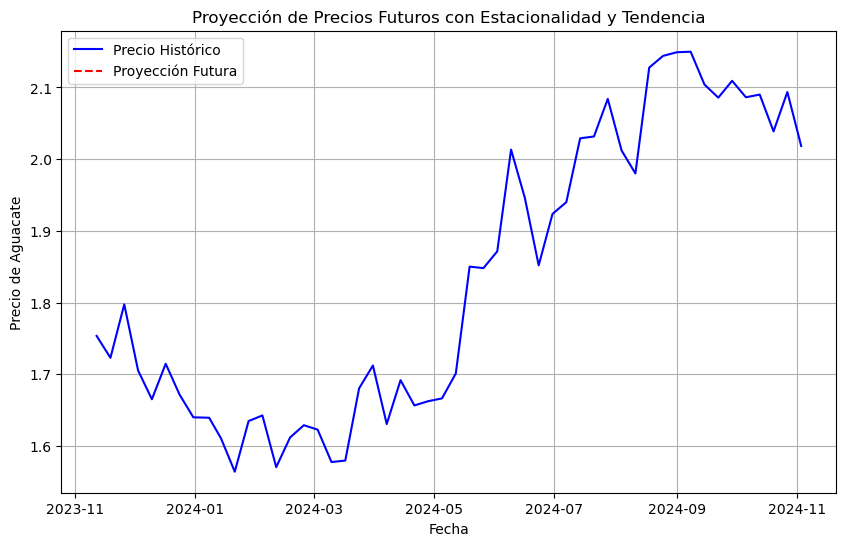

In [20]:
# Paso 1: Proyectar la estacionalidad para el próximo periodo (simplemente repitiendo el patrón)
estacionalidad_proyectada = decompose_organic.seasonal[-52:].values  # Último año
estacionalidad_futura = np.tile(estacionalidad_proyectada, 1)  # Proyectamos un ciclo anual

# Paso 2: Proyectar la tendencia
# Aquí usamos una extrapolación simple para la tendencia (por ejemplo, ajustamos con el último valor de la tendencia)
tendencia_proyectada = np.array([decompose_organic.trend[-1] + i * (decompose_organic.trend[-1] - decompose_organic.trend[-2])
                                 for i in range(1, len(estacionalidad_futura) + 1)])

# Paso 3: Sumar Estacionalidad + Tendencia
precio_futuro_proyectado = tendencia_proyectada + estacionalidad_futura

# Paso 4: Generar las fechas futuras para la proyección
# Asegurarnos que las fechas futuras comienzan justo después de la última fecha de los datos históricos
fechas_futuras = pd.date_range(price_organic.index[-1], periods=len(estacionalidad_futura) + 1, freq='W')[1:]

# Paso 5: Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar precios históricos
plt.plot(price_organic.index[-52:], price_organic.values[-52:], label='Precio Histórico', color='blue')

# Graficar proyección futura
plt.plot(fechas_futuras, precio_futuro_proyectado, label='Proyección Futura', color='red', linestyle='--')

# Añadir leyenda, título y mostrar gráfico
plt.legend()
plt.title('Proyección de Precios Futuros con Estacionalidad y Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Precio de Aguacate')
plt.grid(True)
plt.show()

In [21]:
# Si la tendencia está completamente llena de NaNs, utilizamos el precio promedio
if decompose_organic.trend.isna().all():
    print("La tendencia está llena de NaNs, se usará el precio promedio.")
    tendencia_proyectada = np.full(len(estacionalidad_futura), price_organic.mean())  # Usar el precio promedio
else:
    # Si la tendencia está disponible, usamos el último valor de la tendencia
    tendencia_proyectada = np.full(len(estacionalidad_futura), decompose_organic.trend[-1])

# Proyectamos la estacionalidad (simplemente repetimos el patrón estacional)
estacionalidad_futura = np.tile(decompose_organic.seasonal[-52:].values, 1)

# Sumar Estacionalidad + Tendencia
precio_futuro_proyectado = tendencia_proyectada + estacionalidad_futura

# Generar las fechas futuras
fechas_futuras = pd.date_range(price_organic.index[-1], periods=len(estacionalidad_futura) + 1, freq='W')[1:]


In [22]:
# Verificamos el precio promedio
precio_promedio = price_organic.mean()

# Si la tendencia está completamente llena de NaNs, usamos el precio promedio
if decompose_organic.trend.isna().all():
    print("La tendencia está llena de NaNs, se usará el precio promedio.")
    tendencia_proyectada = np.full(len(estacionalidad_futura), precio_promedio)  # Usar el precio promedio
else:
    # Usamos el último valor de la tendencia si está disponible
    tendencia_proyectada = np.full(len(estacionalidad_futura), decompose_organic.trend[-1])
    print("Tendencia proyectada:", tendencia_proyectada[:5])  # Verificamos los primeros valores de la tendencia

# Ahora, proyectamos la estacionalidad (tomando el patrón estacional de las últimas semanas)
estacionalidad_futura = np.tile(decompose_organic.seasonal[-52:].values, 1)

# Sumar la tendencia proyectada y la estacionalidad proyectada
precio_futuro_proyectado = tendencia_proyectada + estacionalidad_futura

# Verificación de las fechas futuras y la longitud de la proyección
fechas_futuras = pd.date_range(price_organic.index[-1], periods=len(estacionalidad_futura) + 1, freq='W')[1:]


Tendencia proyectada: [nan nan nan nan nan]


In [23]:
# Intentamos una descomposición multiplicativa
decompose_organic_mult = seasonal_decompose(price_organic, model='multiplicative', period=52)

In [24]:
# Suavizado exponencial para obtener la tendencia
tendencia_exponencial = price_organic.ewm(span=12, adjust=False).mean()


In [25]:
# Interpolación para completar los NaNs de la tendencia
tendencia_interpolada = tendencia_exponencial.interpolate(method='linear')

In [26]:
print(tendencia_interpolada.head())
print(tendencia_interpolada.tail())
print("¿Hay NaNs en la tendencia interpolada?", tendencia_interpolada.isna().sum())


                          ASP Current Year
Current Year Week Ending                  
2021-01-11                        1.397372
2021-01-17                        1.401614
2021-01-24                        1.405070
2021-01-31                        1.417270
2021-02-07                        1.401315
                          ASP Current Year
Current Year Week Ending                  
2024-10-06                        2.068655
2024-10-13                        2.071944
2024-10-20                        2.066835
2024-10-27                        2.070958
2024-11-03                        2.062876
¿Hay NaNs en la tendencia interpolada? ASP Current Year    0
dtype: int64


In [27]:
ultima_diferencia = tendencia_interpolada.diff().dropna().iloc[-1]
print("Última diferencia:", ultima_diferencia)


Última diferencia: ASP Current Year   -0.008082
Name: 2024-11-03 00:00:00, dtype: float64


In [29]:
periodos_futuros = 52
print("Periodos futuros:", periodos_futuros)


Periodos futuros: 52


In [30]:
tendencia_futura = [
    tendencia_interpolada.iloc[-1] + (i * ultima_diferencia)
    for i in range(1, periodos_futuros + 1)
]
print("Proyección futura (primeros valores):", tendencia_futura[:5])


Proyección futura (primeros valores): [ASP Current Year    2.054793
Name: 2024-11-03 00:00:00, dtype: float64, ASP Current Year    2.046711
Name: 2024-11-03 00:00:00, dtype: float64, ASP Current Year    2.038629
Name: 2024-11-03 00:00:00, dtype: float64, ASP Current Year    2.030547
Name: 2024-11-03 00:00:00, dtype: float64, ASP Current Year    2.022464
Name: 2024-11-03 00:00:00, dtype: float64]


In [31]:
print("Tendencia interpolada (últimos valores):", tendencia_interpolada.tail())
print("¿Hay NaNs en la tendencia interpolada?", tendencia_interpolada.isna().any())
print("Diferencias (últimos valores):", tendencia_interpolada.diff().tail())
print("Diferencias sin NaNs (últimos valores):", tendencia_interpolada.diff().dropna().tail())


Tendencia interpolada (últimos valores):                           ASP Current Year
Current Year Week Ending                  
2024-10-06                        2.068655
2024-10-13                        2.071944
2024-10-20                        2.066835
2024-10-27                        2.070958
2024-11-03                        2.062876
¿Hay NaNs en la tendencia interpolada? ASP Current Year    False
dtype: bool
Diferencias (últimos valores):                           ASP Current Year
Current Year Week Ending                  
2024-10-06                        0.003214
2024-10-13                        0.003289
2024-10-20                       -0.005109
2024-10-27                        0.004123
2024-11-03                       -0.008082
Diferencias sin NaNs (últimos valores):                           ASP Current Year
Current Year Week Ending                  
2024-10-06                        0.003214
2024-10-13                        0.003289
2024-10-20                       -0.0

In [32]:
# Seleccionamos la columna relevante
tendencia_simple = tendencia_interpolada["ASP Current Year"]

# Calculamos las diferencias eliminando NaNs
diferencias = tendencia_simple.diff().dropna()
if diferencias.empty:
    raise ValueError("No se pudo calcular diferencias; la serie de diferencias está vacía.")
ultima_diferencia = diferencias.iloc[-1]

# Proyectamos la tendencia futura
tendencia_futura = tendencia_simple.iloc[-1] + (ultima_diferencia * np.arange(1, periodos_futuros + 1))

# Creamos la Serie con el índice de fechas futuras
proyeccion_futura = pd.Series(tendencia_futura, index=fechas_futuras)

# Verificación adicional
print("Última diferencia calculada:", ultima_diferencia)
print("Tendencia futura proyectada (primeros valores):", tendencia_futura[:5])
print("Fechas futuras generadas:", fechas_futuras[:5])


Última diferencia calculada: -0.008082252875217133
Tendencia futura proyectada (primeros valores): [2.05479329 2.04671104 2.03862879 2.03054654 2.02246428]
Fechas futuras generadas: DatetimeIndex(['2024-11-10', '2024-11-17', '2024-11-24', '2024-12-01',
               '2024-12-08'],
              dtype='datetime64[ns]', freq='W-SUN')


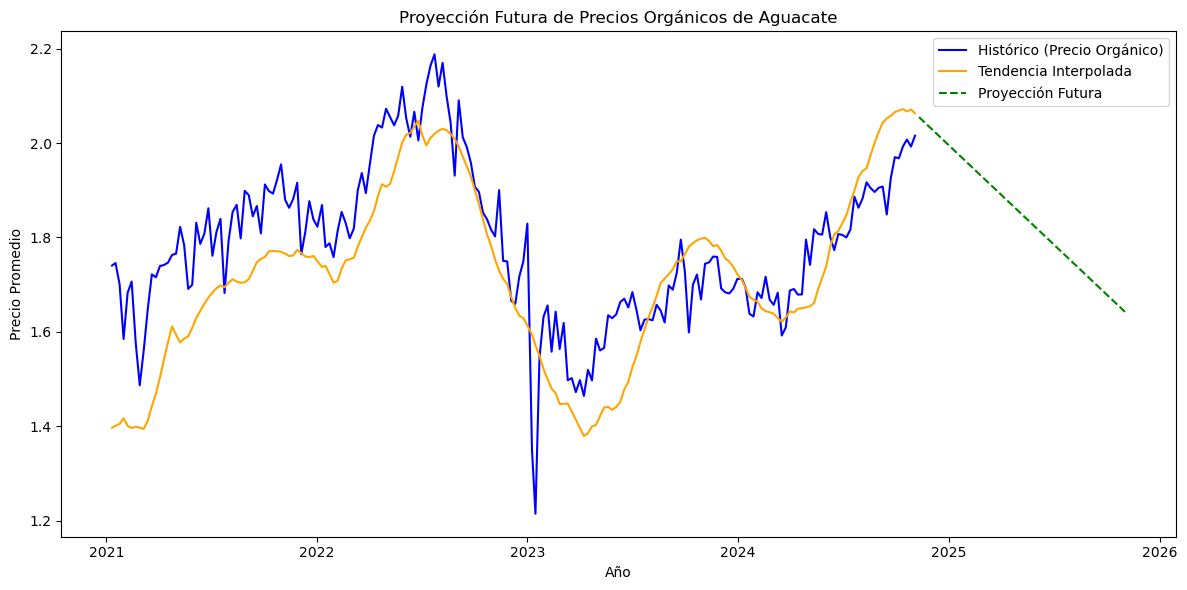

In [47]:
# Asegúrate de que price_organic sea una serie temporal de precios de aguacates orgánicos
# Interpolamos los precios para calcular la tendencia
tendencia_interpolada_organic = price_organic.interpolate(method='linear')

# Graficamos los datos históricos y la proyección futura
plt.figure(figsize=(12, 6))

# Graficamos la serie observada (histórica)
plt.plot(price_organic.index, price_organic, label='Histórico (Precio Orgánico)', color='blue')

# Graficamos la tendencia suavizada (si es necesario)
plt.plot(tendencia_interpolada.index, tendencia_interpolada, label='Tendencia Interpolada', color='orange')

# Graficamos la proyección futura
plt.plot(fechas_futuras, proyeccion_futura, label='Proyección Futura', color='green', linestyle='--')

# Añadimos título y etiquetas
plt.title('Proyección Futura de Precios Orgánicos de Aguacate')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.legend()

# Mostramos el gráfico
plt.tight_layout()
plt.show()

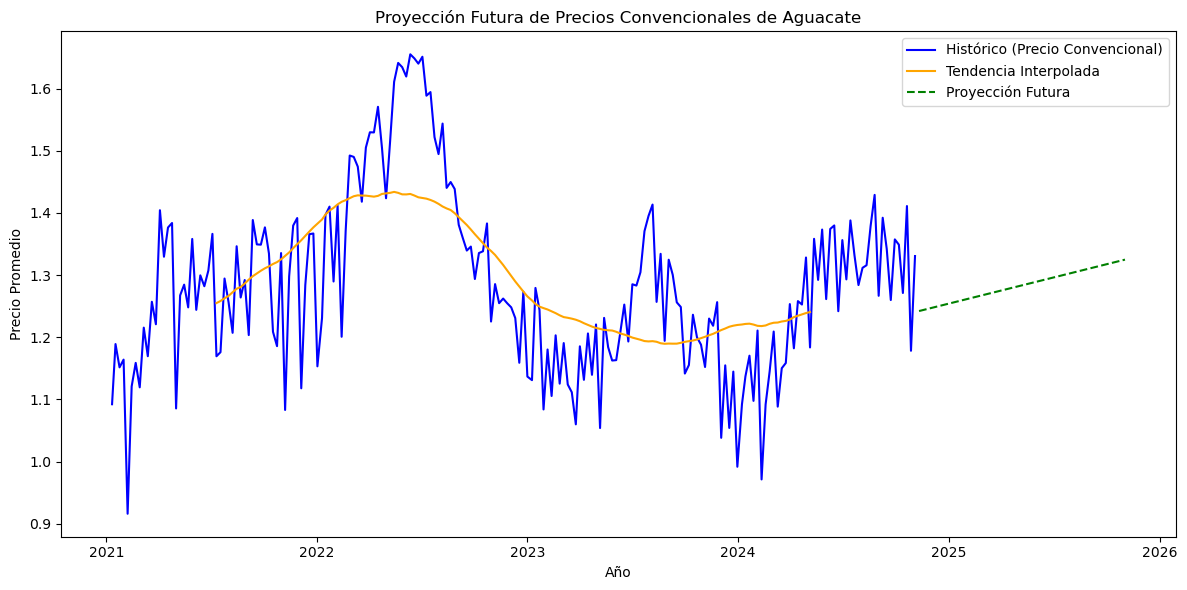

In [49]:
# Descomposición de la serie temporal de aguacates convencionales
decompose_conventional = seasonal_decompose(price_conventional, model='additive', period=52)

# Interpolamos la tendencia de los precios convencionales
tendencia_conventional = decompose_conventional.trend.dropna()
tendencia_interpolada_conventional = tendencia_conventional.interpolate(method='linear')

# Calculamos las diferencias de la tendencia para proyectar
diferencias_conventional = tendencia_interpolada_conventional.diff().dropna()

# Última diferencia calculada para proyectar
ultima_diferencia_conventional = diferencias_conventional.iloc[-1]

# Proyectamos la tendencia futura
periodos_futuros = 52
tendencia_futura_conventional = tendencia_interpolada_conventional.iloc[-1] + (diferencias_conventional.iloc[-1] * (np.arange(1, periodos_futuros + 1)))

# Generamos las fechas futuras para los próximos periodos
fechas_futuras_conventional = pd.date_range(price_conventional.index[-1], periods=periodos_futuros + 1, freq='W')[1:]

# Creamos la serie de proyección futura para los precios convencionales
proyeccion_futura_conventional = pd.Series(tendencia_futura_conventional, index=fechas_futuras_conventional)

# Graficamos los datos históricos, la tendencia suavizada y la proyección futura para aguacates convencionales
plt.figure(figsize=(12, 6))

# Graficamos la serie histórica de precios convencionales
plt.plot(price_conventional.index, price_conventional, label='Histórico (Precio Convencional)', color='blue')

# Graficamos la tendencia suavizada para los precios convencionales
plt.plot(tendencia_interpolada_conventional.index, tendencia_interpolada_conventional, label='Tendencia Interpolada', color='orange')

# Graficamos la proyección futura para los precios convencionales
plt.plot(fechas_futuras_conventional, proyeccion_futura_conventional, label='Proyección Futura', color='green', linestyle='--')

# Añadimos título y etiquetas
plt.title('Proyección Futura de Precios Convencionales de Aguacate')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.legend()

# Mostramos el gráfico
plt.tight_layout()
plt.show()


Interpretación de la interpolación:

Se ha utilizado interpolación para poder hallar datos faltantes de manera suavizada. El vector con los valores observados no se utilizó implicitamente, pero podemos interpretarlo como el conjunto de valores generados a través de la interpolación de la tendencia. En este caso específico, hemos utilizado "tendencia_interpolada_conventional", que es el resultado de interpolar los valores de la tendencia que obtenemos tras descomponer la serie temporal con "seasonal_decompose". Esto suaviza los valores de la tendencia a lo largo del tiempo, proporcionando estimaciones más continuas de la tendencia, especialmente en periodos donde los datos de la tendencia original podrían faltar o ser irregulares.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


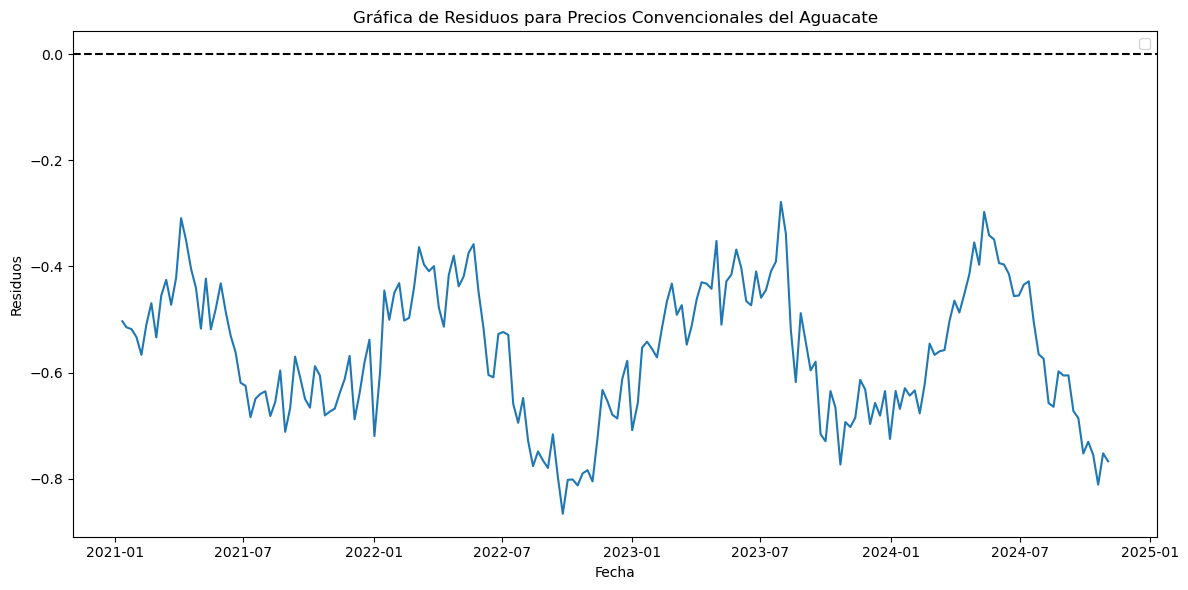

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


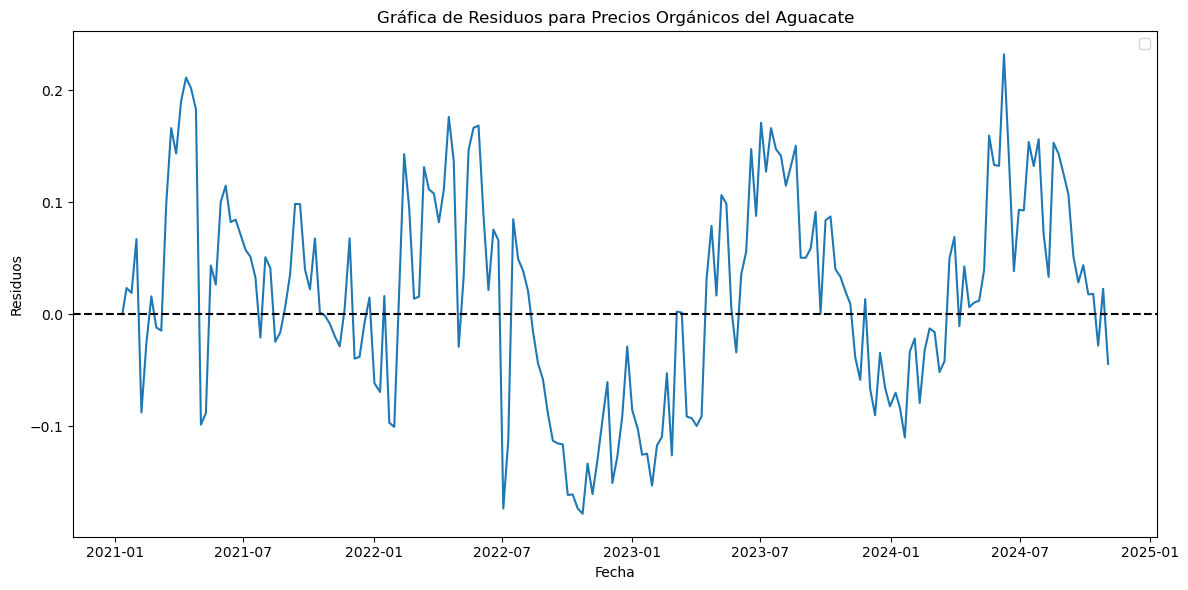

In [35]:
# Residuos entre la serie histórica y la tendencia suavizada
residuos_historicos = price_conventional - tendencia_interpolada

# Graficamos los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuos_historicos.index, residuos_historicos)
plt.axhline(0, color='black', linestyle='--')
plt.title('Gráfica de Residuos para Precios Convencionales del Aguacate')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.legend()
plt.tight_layout()
plt.show()

# Residuos entre la serie histórica y la tendencia suavizada
residuos_historicos = price_organic - tendencia_interpolada

# Graficamos los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuos_historicos.index, residuos_historicos)
plt.axhline(0, color='black', linestyle='--')
plt.title('Gráfica de Residuos para Precios Orgánicos del Aguacate')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Asegurarnos de que las series tengan la misma longitud y el mismo índice
price_conventional_aligned = price_conventional.loc[tendencia_interpolada.index]

# Calculamos el error absoluto medio para los convencionales(MAE)
mae_conv = mean_absolute_error(price_conventional_aligned, tendencia_interpolada)
print(f"Error Absoluto Medio Aguacate Convencional (MAE): {mae_conv}")

# Calculamos el error cuadrático medio para los convencionales (RMSE)
rmse_conv = np.sqrt(mean_squared_error(price_conventional_aligned, tendencia_interpolada))
print(f"Error Cuadrático Medio Aguacate Convencional (RMSE): {rmse_conv}")

#Hacemos lo mismo con los precios del aguacate organico: 
price_organic_aligned = price_organic.loc[tendencia_interpolada.index]

# Calculamos el error absoluto medio para los organicos (MAE)
mae_org = mean_absolute_error(price_organic_aligned, tendencia_interpolada)
print(f"Error Absoluto Medio Aguacate Orgánico (MAE): {mae_org}")

# Calculamos el error cuadrático medio para los organicos (RMSE)
rmse_org = np.sqrt(mean_squared_error(price_conventional_aligned, tendencia_interpolada))
print(f"Error Cuadrático Medio Aguacate Orgánico (RMSE): {rmse_org}")

Error Absoluto Medio Aguacate Convencional (MAE): 0.5617444143101235
Error Cuadrático Medio Aguacate Convencional (RMSE): 0.5760666670544891
Error Absoluto Medio Aguacate Orgánico (MAE): 0.07694878147462166
Error Cuadrático Medio Aguacate Orgánico (RMSE): 0.5760666670544891


In [38]:
# Alinear las series price_conventional y tendencia_interpolada
price_conventional_aligned, tendencia_interpolada_aligned = price_conventional.align(tendencia_interpolada, join='inner')

# Verifica que las series estén alineadas correctamente
print(price_conventional_aligned.head())
print(tendencia_interpolada_aligned.head())

# Ahora calculamos el MAE y RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_conventional = mean_absolute_error(price_conventional_aligned, tendencia_interpolada_aligned)
rmse_conventional = np.sqrt(mean_squared_error(price_conventional_aligned, tendencia_interpolada_aligned))

print(f"MAE Aguacate Convencional: {mae_conventional}")
print(f"RMSE Aguacate Convencional: {rmse_conventional}")



                          ASP Current Year
Current Year Week Ending                  
2021-01-11                        0.894059
2021-01-17                        0.886782
2021-01-24                        0.886880
2021-01-31                        0.883972
2021-02-07                        0.834663
                          ASP Current Year
Current Year Week Ending                  
2021-01-11                        1.397372
2021-01-17                        1.401614
2021-01-24                        1.405070
2021-01-31                        1.417270
2021-02-07                        1.401315
MAE Aguacate Convencional: 0.5617444143101235
RMSE Aguacate Convencional: 0.5760666670544891


In [39]:
print(f"Longitud de price_conventional: {len(price_conventional)}")
print(f"Longitud de tendencia_interpolada: {len(tendencia_interpolada)}")

Longitud de price_conventional: 200
Longitud de tendencia_interpolada: 200


In [40]:
# Alinear las series price_organic y tendencia_interpolada_organic
price_organic_aligned, tendencia_interpolada_organic_aligned = price_organic.align(tendencia_interpolada_organic, join='inner')

# Verifica que las series estén alineadas correctamente
print(price_organic_aligned.head())
print(tendencia_interpolada_organic_aligned.head())

# Ahora calculamos el MAE y RMSE para los aguacates orgánicos
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_organic = mean_absolute_error(price_organic_aligned, tendencia_interpolada_organic_aligned)
rmse_organic = np.sqrt(mean_squared_error(price_organic_aligned, tendencia_interpolada_organic_aligned))

print(f"MAE Aguacate Orgánico: {mae_organic}")
print(f"RMSE Aguacate Orgánico: {rmse_organic}")


                          ASP Current Year
Current Year Week Ending                  
2021-01-11                        1.397372
2021-01-17                        1.424944
2021-01-24                        1.424075
2021-01-31                        1.484373
2021-02-07                        1.313563
                          ASP Current Year
Current Year Week Ending                  
2021-01-11                        1.397372
2021-01-17                        1.424944
2021-01-24                        1.424075
2021-01-31                        1.484373
2021-02-07                        1.313563
MAE Aguacate Orgánico: 0.0
RMSE Aguacate Orgánico: 0.0


In [41]:
from sklearn.linear_model import LinearRegression

# Asegúrate de tener índices numéricos para la regresión
price_organic_numeric = price_organic.reset_index()
price_organic_numeric['week_num'] = range(len(price_organic_numeric))

# Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(price_organic_numeric[['week_num']], price_organic_numeric['ASP Current Year'])

# Calculamos la tendencia (predicción del modelo)
tendencia_interpolada_organic = model.predict(price_organic_numeric[['week_num']])

# Convertimos la tendencia de nuevo en un DataFrame con las fechas
tendencia_interpolada_organic = pd.Series(tendencia_interpolada_organic, index=price_organic.index)

# Verifica las primeras filas
print(tendencia_interpolada_organic.head())


Current Year Week Ending
2021-01-11    1.647826
2021-01-17    1.648734
2021-01-24    1.649642
2021-01-31    1.650550
2021-02-07    1.651458
dtype: float64


In [42]:
# Verificar los tipos de datos de las series
print(price_organic.dtypes)
print(tendencia_interpolada_organic.dtypes)

# Eliminar NaNs antes de realizar el cálculo
price_organic_cleaned = price_organic.dropna()
tendencia_interpolada_organic_cleaned = tendencia_interpolada_organic.dropna()

# Alineamos de nuevo después de limpiar los NaNs
price_organic_aligned, tendencia_interpolada_organic_aligned = price_organic_cleaned.align(tendencia_interpolada_organic_cleaned, join='inner', axis=0)


ASP Current Year    float64
dtype: object
float64


In [43]:
# Alinear las series price_organic y tendencia_interpolada_organic
price_organic_cleaned, tendencia_interpolada_organic_cleaned = price_organic.align(tendencia_interpolada_organic, join='inner', axis=0)

# Verifica que las series estén alineadas correctamente
print("Precio Orgánico Alineado (primeros valores):")
print(price_organic_cleaned.head())
print("Tendencia Interpolada Alineada (primeros valores):")
print(tendencia_interpolada_organic_cleaned.head())

# Verificar que ambas series tengan la misma longitud
print(f"Longitud de price_organic_cleaned: {len(price_organic_cleaned)}")
print(f"Longitud de tendencia_interpolada_organic_cleaned: {len(tendencia_interpolada_organic_cleaned)}")

# Verificar el tipo de las series
print(f"Tipo de dato de price_organic_cleaned: {type(price_organic_cleaned)}")
print(f"Tipo de dato de tendencia_interpolada_organic_cleaned: {type(tendencia_interpolada_organic_cleaned)}")

# Asegúrate de que las series sean de tipo pd.Series y unidimensionales
if isinstance(price_organic_cleaned, pd.Series) and isinstance(tendencia_interpolada_organic_cleaned, pd.Series):
    print("Ambas series son pd.Series.")
else:
    print("Hay un problema con el tipo de las series.")

# Ahora calculamos el MAE y RMSE para los aguacates orgánicos
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_organic = mean_absolute_error(price_organic_cleaned, tendencia_interpolada_organic_cleaned)
rmse_organic = np.sqrt(mean_squared_error(price_organic_cleaned, tendencia_interpolada_organic_cleaned))

print(f"MAE Aguacate Orgánico: {mae_organic}")
print(f"RMSE Aguacate Orgánico: {rmse_organic}")



Precio Orgánico Alineado (primeros valores):
                          ASP Current Year
Current Year Week Ending                  
2021-01-11                        1.397372
2021-01-17                        1.424944
2021-01-24                        1.424075
2021-01-31                        1.484373
2021-02-07                        1.313563
Tendencia Interpolada Alineada (primeros valores):
Current Year Week Ending
2021-01-11    1.647826
2021-01-17    1.648734
2021-01-24    1.649642
2021-01-31    1.650550
2021-02-07    1.651458
dtype: float64
Longitud de price_organic_cleaned: 200
Longitud de tendencia_interpolada_organic_cleaned: 200
Tipo de dato de price_organic_cleaned: <class 'pandas.core.frame.DataFrame'>
Tipo de dato de tendencia_interpolada_organic_cleaned: <class 'pandas.core.series.Series'>
Hay un problema con el tipo de las series.
MAE Aguacate Orgánico: 0.16838247841147816
RMSE Aguacate Orgánico: 0.20528483137380496


In [44]:
# Seleccionar la columna del DataFrame para convertirla en una Serie
price_organic_cleaned_series = price_organic_cleaned['ASP Current Year']

# Ahora calculamos el MAE y RMSE para los aguacates orgánicos
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_organic = mean_absolute_error(price_organic_cleaned_series, tendencia_interpolada_organic_cleaned)
rmse_organic = np.sqrt(mean_squared_error(price_organic_cleaned_series, tendencia_interpolada_organic_cleaned))

print(f"MAE Aguacate Orgánico: {mae_organic}")
print(f"RMSE Aguacate Orgánico: {rmse_organic}")


MAE Aguacate Orgánico: 0.16838247841147816
RMSE Aguacate Orgánico: 0.20528483137380496


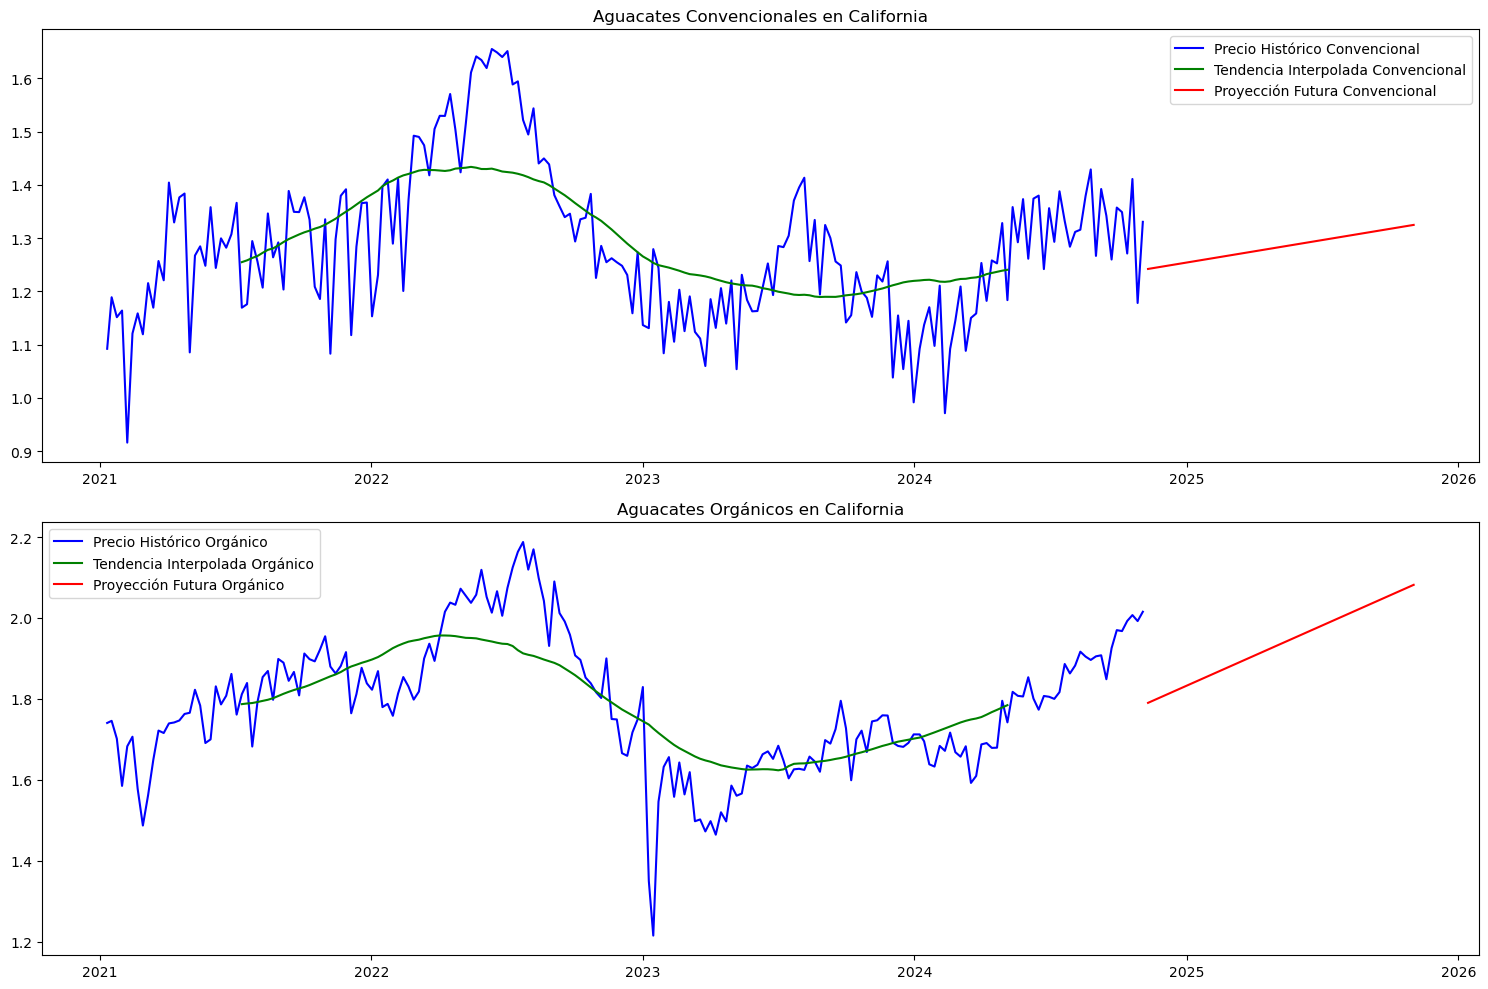

In [45]:
# Filtrar los datos para California
california_data = filtered_df_greaterregions[filtered_df_greaterregions['Geography'] == 'California']

# Filtramos los datos para aguacates convencionales y orgánicos
price_conventional = california_data[california_data['Type'] == 'Conventional'][['Current Year Week Ending', 'ASP Current Year']]
price_organic = california_data[california_data['Type'] == 'Organic'][['Current Year Week Ending', 'ASP Current Year']]

# Convertimos la columna de fecha a datetime
price_conventional['Current Year Week Ending'] = pd.to_datetime(price_conventional['Current Year Week Ending'])
price_organic['Current Year Week Ending'] = pd.to_datetime(price_organic['Current Year Week Ending'])

# Agrupamos por fecha para obtener el promedio
price_conventional = price_conventional.groupby('Current Year Week Ending').mean()
price_organic = price_organic.groupby('Current Year Week Ending').mean()

# Descomponemos las series temporales
decompose_conventional = seasonal_decompose(price_conventional, model='additive', period=52)
decompose_organic = seasonal_decompose(price_organic, model='additive', period=52)

# Usamos la tendencia para interpolar
tendencia_conventional = decompose_conventional.trend.dropna()
tendencia_organic = decompose_organic.trend.dropna()

# Interpolación
tendencia_interpolada_conventional = tendencia_conventional.interpolate(method='polynomial', order=2)
tendencia_interpolada_organic = tendencia_organic.interpolate(method='polynomial', order=2)

# Proyección hacia el futuro
periodos_futuros = 52
fechas_futuras = pd.date_range(price_conventional.index[-1], periods=periodos_futuros + 1, freq='W')[1:]

# Calculamos la tendencia futura
tendencia_futura_conventional = tendencia_interpolada_conventional.iloc[-1] + (tendencia_interpolada_conventional.diff().iloc[-1] * np.arange(1, periodos_futuros + 1))
tendencia_futura_organic = tendencia_interpolada_organic.iloc[-1] + (tendencia_interpolada_organic.diff().iloc[-1] * np.arange(1, periodos_futuros + 1))

# Crear la proyección futura
proyeccion_futura_conventional = pd.Series(tendencia_futura_conventional, index=fechas_futuras)
proyeccion_futura_organic = pd.Series(tendencia_futura_organic, index=fechas_futuras)

# Graficar los resultados
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Gráfico de los aguacates convencionales
axes[0].plot(price_conventional.index, price_conventional['ASP Current Year'], label='Precio Histórico Convencional', color='blue')
axes[0].plot(tendencia_interpolada_conventional.index, tendencia_interpolada_conventional, label='Tendencia Interpolada Convencional', color='green')
axes[0].plot(proyeccion_futura_conventional.index, proyeccion_futura_conventional, label='Proyección Futura Convencional', color='red')
axes[0].set_title('Aguacates Convencionales en California')
axes[0].legend()

# Gráfico de los aguacates orgánicos
axes[1].plot(price_organic.index, price_organic['ASP Current Year'], label='Precio Histórico Orgánico', color='blue')
axes[1].plot(tendencia_interpolada_organic.index, tendencia_interpolada_organic, label='Tendencia Interpolada Orgánico', color='green')
axes[1].plot(proyeccion_futura_organic.index, proyeccion_futura_organic, label='Proyección Futura Orgánico', color='red')
axes[1].set_title('Aguacates Orgánicos en California')
axes[1].legend()

plt.tight_layout()
plt.show()

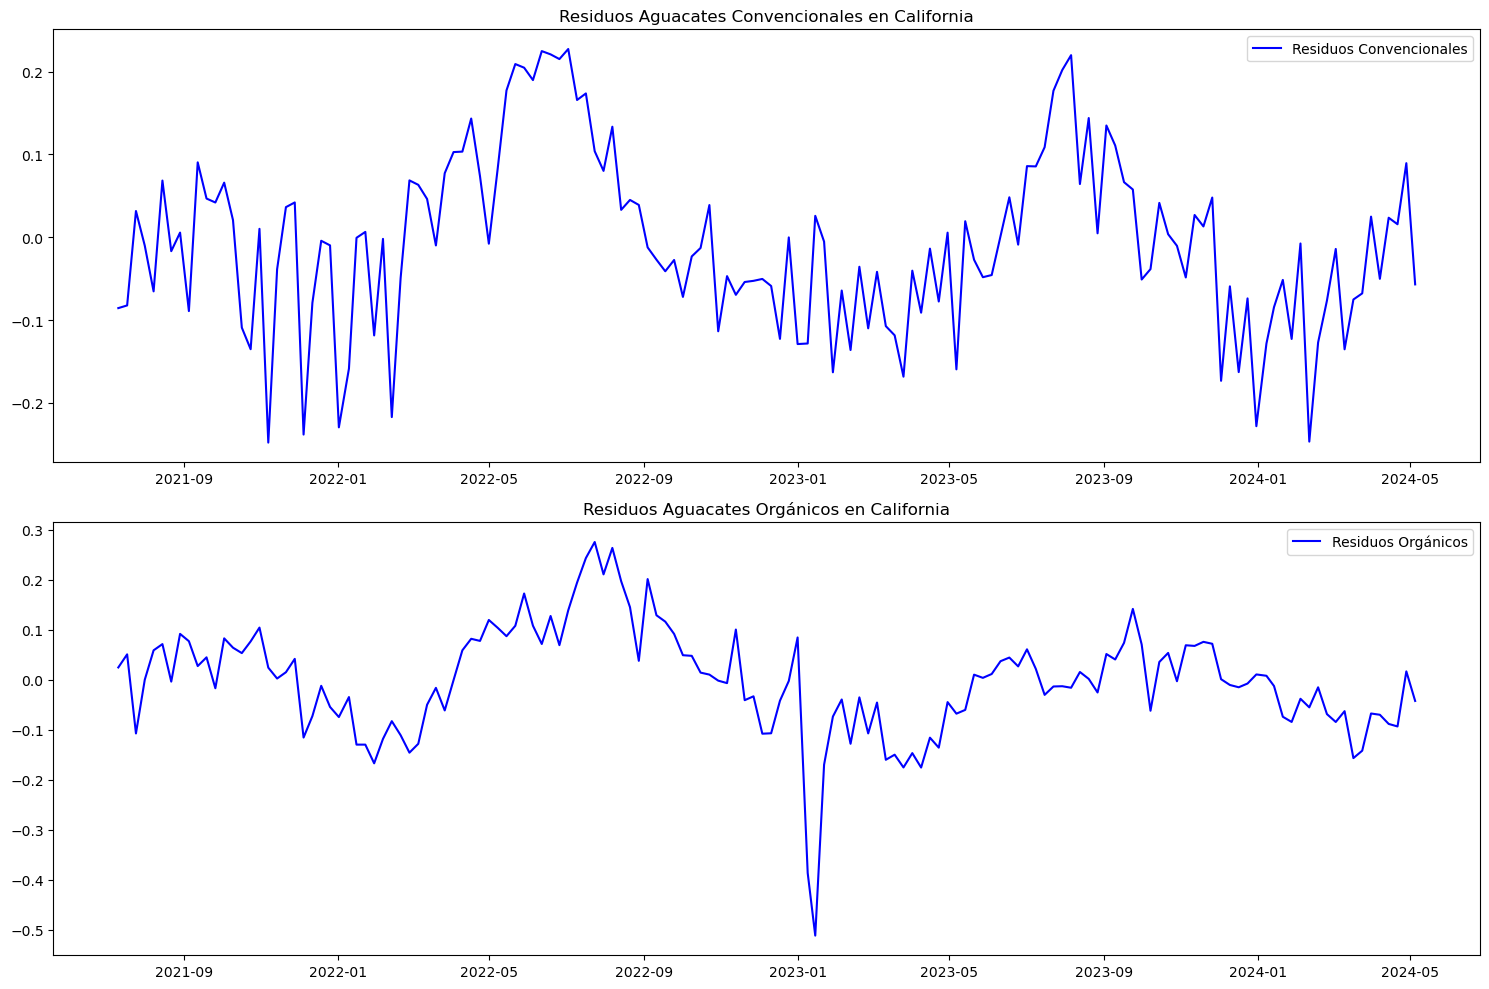

In [46]:
# Calcular los residuos para los aguacates convencionales y orgánicos
residuos_conventional = price_conventional['ASP Current Year'] - tendencia_interpolada_conventional
residuos_organic = price_organic['ASP Current Year'] - tendencia_interpolada_organic

# Graficar los residuos
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Gráfico de residuos para los aguacates convencionales
axes[0].plot(residuos_conventional.index, residuos_conventional, label='Residuos Convencionales', color='blue')
axes[0].set_title('Residuos Aguacates Convencionales en California')
axes[0].legend()

# Gráfico de residuos para los aguacates orgánicos
axes[1].plot(residuos_organic.index, residuos_organic, label='Residuos Orgánicos', color='blue')
axes[1].set_title('Residuos Aguacates Orgánicos en California')
axes[1].legend()

plt.tight_layout()
plt.show()
